In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

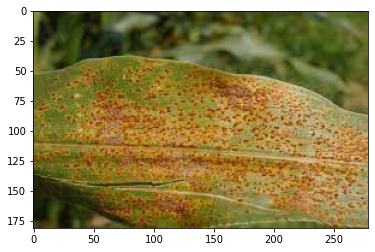

In [28]:
image = cv2.cvtColor(cv2.imread('./rust.jpeg'), cv2.COLOR_BGR2RGB)
hsv_image = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)


plt.imshow(image)

In [29]:


def stretch_contrast(image):
    '''
    Function to perform contrast stretching given an input image.
    
    Inputs =>
    image : numpy.ndarray representation of the image (must be only one channel)
    
    Returns =>
    con_image : min-max contrast stretched representation of the input image
    
    '''
    
    con_image = np.copy(image).reshape(-1)
    
    #min intensity
    min_i = np.amin(con_image)
    #max intensity
    max_i = np.amax(con_image)
    
    for idx, pixel in enumerate(con_image):
        
        con_image[idx] = 255 * ((pixel - min_i) / (max_i - min_i))
    
    #reshape and return
    con_image = con_image.reshape(image.shape)
    con_image = con_image.astype("uint8")
    
    return con_image
    



In [30]:
def find_mask_contour_area(image, mask):
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3))
    opening = cv2.morphologyEx(mask, cv2.MORPH_OPEN, kernel, iterations=1)
    # cv2.imshow("opening", opening)
    cnts = cv2.findContours(opening, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    cnts = cnts[0] if len(cnts) == 2 else cnts[1]

    area = 0
    for c in cnts:
        area += cv2.contourArea(c)
        cv2.drawContours(image, [c], 0, (0, 0, 0), 2)

    return area

50040.0


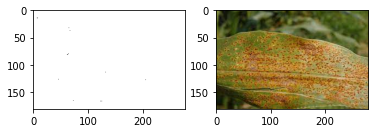

In [31]:
 # Set threshold
lower_green = (10, 10, 10)
upper_green = (130, 255, 255)



mask = cv2.inRange(hsv_image, lower_green, upper_green)
result = cv2.bitwise_and(image, image, mask=mask)

area = find_mask_contour_area(image, mask)
print(area)

plt.subplot(1, 2, 1)
plt.imshow(mask, cmap="gray")
plt.subplot(1, 2, 2)
plt.imshow(result)
plt.show()

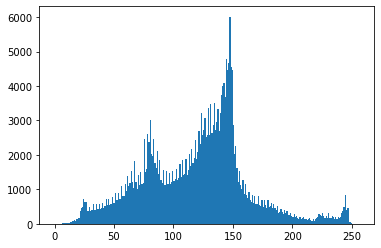

In [32]:
con_res = stretch_contrast(res)
plt.hist(con_res.reshape(-1), bins = 256, range = (0, 256))

plt.show()

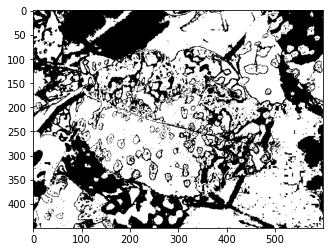

In [9]:
_, th  = cv2.threshold(res, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

plt.imshow(th, cmap = 'gray', vmin = 0, vmax = 255)